<a href="https://colab.research.google.com/github/Carlos19033/IA-003-2025/blob/main/Assignments%20/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5.- Artificial Neural Network: feedforward.**

CLASS: Artificial Intelligence

GROUP: 003

HOUR: N1

TEAM:

- CARLOS ALBERTO SAUCEDO RIOS              1968121
- MARIANGELES SOFIA RODRIGUEZ UZCATEGUI    2132315
- AMANDA GUADALUPE BUSTOS BANDA            2052995

1-LOAD LIBRARIES

 Importing essential Python libraries for building and training the neural network.

In [2]:
import numpy as np                                 # For numerical operations
import matplotlib.pyplot as plt                    # For data visualization
from tensorflow.keras.datasets import mnist        # To load the MNIST dataset
from tensorflow.keras.models import Sequential     # For sequential model creation
from tensorflow.keras.layers import Dense, Flatten # Layers for feedforward NN
from tensorflow.keras.utils import to_categorical  # To convert labels to one-hot encoding


STEP 2: LOAD DATA

The MNIST dataset is automatically downloaded by Keras.

It consists of 70,000 images of handwritten digits (0–9),

where 60,000 are for training and 10,000 for testing.

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# train_data: contains 28x28 pixel grayscale images (values from 0 to 255).
# train_labels: contains the real numbers (0–9) corresponding to each image.
# test_data / test_labels: used to evaluate if the model learned correctly.

print("Training dataset size:", train_data.shape)
print("Testing dataset size:", test_data.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training dataset size: (60000, 28, 28)
Testing dataset size: (10000, 28, 28)


3. DATA VISUALIZATION

Here we display some images from the MNIST dataset.


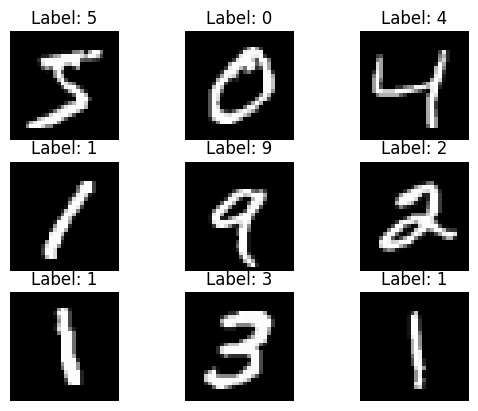

In [12]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


4. DATA PREPROCESSING

Data normalization and transformation so the neural network can process it properly.



In [5]:
# Normalization:
# Pixel values range from 0 to 255, and are scaled to a 0–1 range
# to make the training process more efficient and stable.
train_data = train_data / 255
test_data = test_data / 255

# One-hot encoding:
# Each label (0–9) is transformed into a 10-position vector,
# with a 1 in the position of its corresponding class.
# Example: number 3 → [0,0,0,1,0,0,0,0,0,0]
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

5. MODEL SELECTION AND TRAINING

Here we create and train the feedforward neural network.



In [6]:
# FFNN (Feedforward Neural Network) model structure:
# - Sequential: layers are added in order.
# - Flatten: converts each 28x28 image into a vector of 784 values.
# - Dense: fully connected layer (each neuron connects to every neuron in the next layer).

model = Sequential([
    Flatten(input_shape=(28, 28)),        # Capa de entrada: aplanar imagen 28x28
    Dense(128, activation='relu'),        # Capa oculta 1 con 128 neuronas y función ReLU
    Dense(64, activation='relu'),         # Capa oculta 2 con 64 neuronas
    Dense(10, activation='softmax')       # Capa de salida: 10 neuronas (dígitos 0-9)
])
# - Each "Dense" adds a set of connected neurons.
# - 'relu' (Rectified Linear Unit) activates only positive values, helping the model learn nonlinear patterns.
# - 'softmax' converts outputs into probabilities that sum to 1 (each position represents a digit).



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6. COMPILATION

(Part of "Model selection and training")

In [7]:
# Here we define how the model learns:
# - Loss function: measures the error. categorical_crossentropy is used for multi-class classification.
# - Optimizer: algorithm that adjusts weights (Adam is efficient and fast).
# - Metric: accuracy (percentage of correct classifications).

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

7. TRAINING

 (Model training)



In [8]:
# fit(): trains the model with training data (X, y)
# epochs: number of complete passes over the dataset.
# batch_size: number of samples processed before weights are updated.
# validation_split: portion of training data used for validation at each epoch.


history = model.fit(
    train_data, train_labels_cat,
    epochs=5,           # Número de pasadas sobre todo el dataset
    batch_size=32,      # Tamaño de los lotes de entrenamiento
    validation_split=0.1 # Parte del entrenamiento usada para validación
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8666 - loss: 0.4611 - val_accuracy: 0.9678 - val_loss: 0.1128
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9667 - loss: 0.1111 - val_accuracy: 0.9728 - val_loss: 0.0832
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0722 - val_accuracy: 0.9735 - val_loss: 0.0970
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9708 - val_loss: 0.1083
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9768 - val_loss: 0.0836


8. MODEL TESTING

(Model evaluation)




In [13]:
# evaluate(): evaluates the model with test data (unseen during training).
# Returns two values: loss and accuracy.
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat)
print(f"\nThe of the model with data test: {test_accuracy*100:.2f}%")

# - The evaluate() function measures how well the model generalizes.
# - Accuracy is calculated as:
#   Accuracy = (Number of correct predictions / Total images) * 100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0957

The of the model with data test: 97.48%


9. PREDICTIONS

(Model predictions)


In [10]:
# predict(): generates the model’s output for test images.
# Each prediction is a vector of 10 probabilities (one for each possible digit).
predictions = model.predict(test_data)

# np.argmax() retrieves the index with the highest probability (predicted digit).
predicted_classes = np.argmax(predictions, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


10. SHOW 5 PREDICTIONS (Display 5 results)



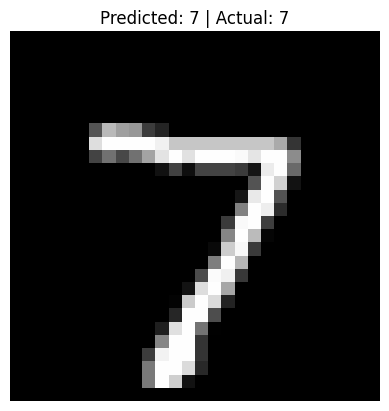

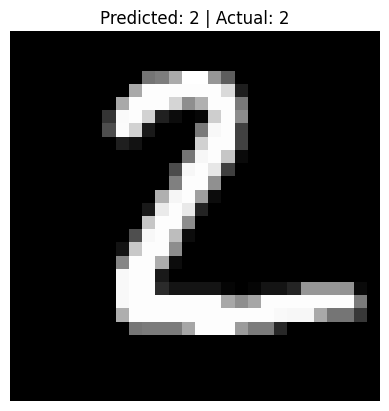

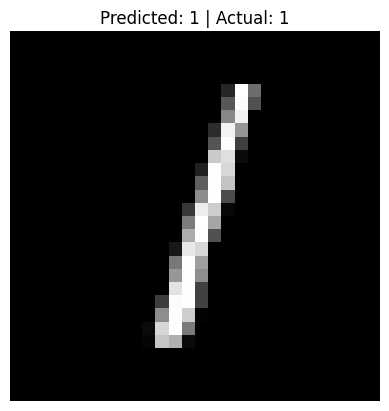

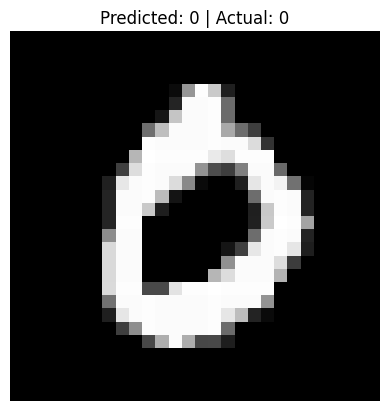

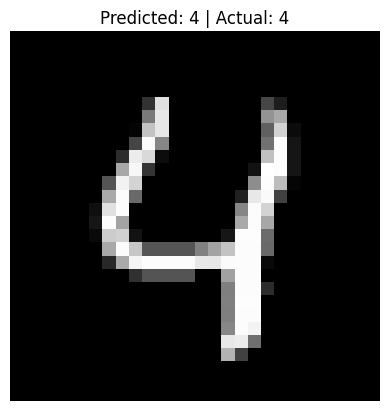

In [11]:
# Show 5 images from the test set along with:
# - predicted value (from the model)
# - real value (correct label)

for i in range(5):
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]} | Actual: {test_labels[i]}")
    plt.axis('off')
    plt.show()